In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
# Input data
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

def bar_chart(feature):
    survived = df_train[df_train["Survived"]==1][feature].value_counts()
    dead = df_train[df_train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (7, 5), title = feature)

In [41]:
t1 = df_train.Cabin.count()

In [4]:
t2 = df_train.Cabin.str.split(' ')

In [5]:
t2 = t2.apply(lambda x: pd.Series(x))

In [6]:
df_train["Cabin_cnt"] = t2.count(axis = 1)

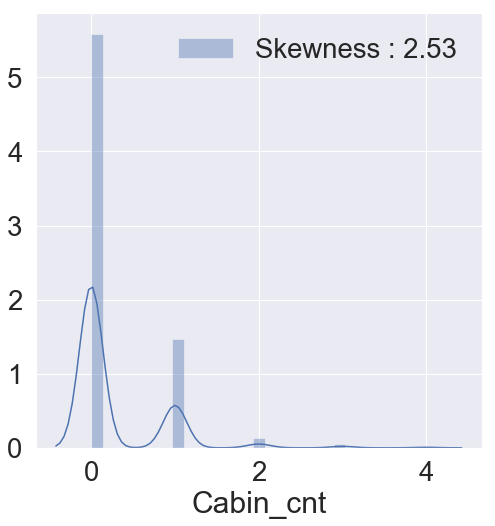

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Cabin_cnt'], color='b', label='Skewness : {:.2f}'.format(df_train['Cabin_cnt'].skew()), ax=ax)
g = g.legend(loc='best')

In [8]:
df_train['Cabin_b'] = df_train.Cabin.isnull()

In [9]:
df_train['Cabin_ib'] = df_train['Cabin_b'].map({True:0, False:1})

In [10]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cnt,Cabin_b,Cabin_ib
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,True,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,False,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,True,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,True,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,True,0


In [11]:
df_train.Cabin.count()

204

In [12]:
df_train.Cabin_ib.count()

891

In [13]:
df_train.Cabin_ib.value_counts()

0    687
1    204
Name: Cabin_ib, dtype: int64

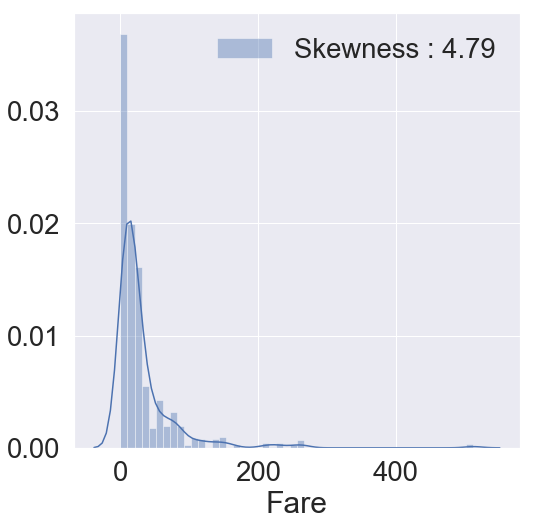

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [7]:
df_train['Fare_log'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

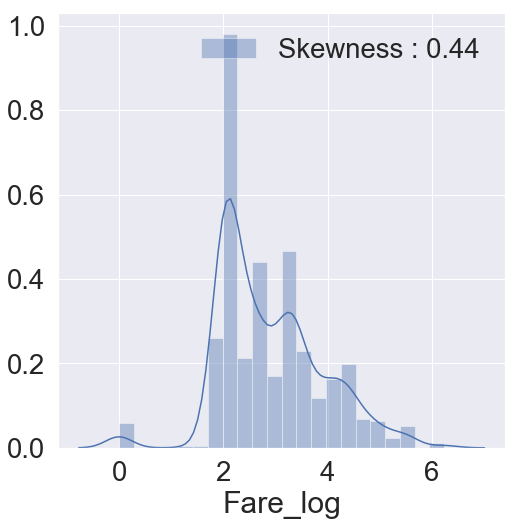

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare_log'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare_log'].skew()), ax=ax)
g = g.legend(loc='best')

In [14]:
def category_fare_log(x):
    if x == 0:
        return 0
    elif x < 1:
        return 1
    elif x < 2:
        return 2
    elif x < 3:
        return 3
    elif x < 4:
        return 4    
    else:
        return 5

df_train['Fare_cat'] = df_train['Fare_log'].apply(category_fare_log)

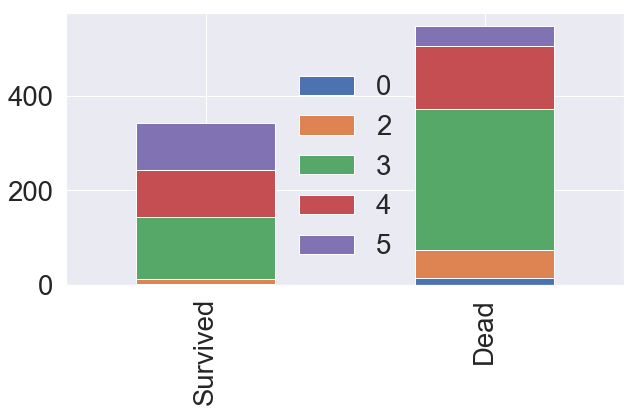

In [15]:
bar_chart('Fare_cat')

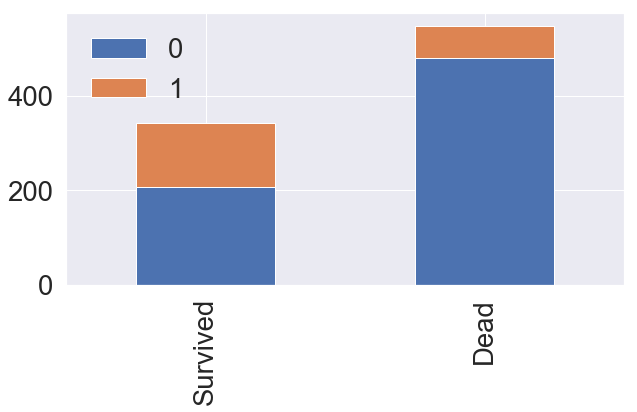

In [15]:
bar_chart('Cabin_ib')

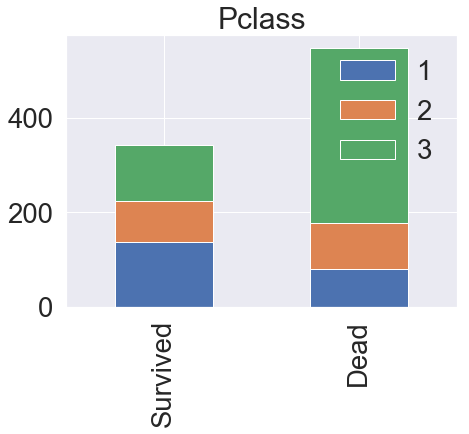

In [26]:
bar_chart('Pclass')

ValueError: could not convert string to float: 'Dooley, Mr. Patrick'

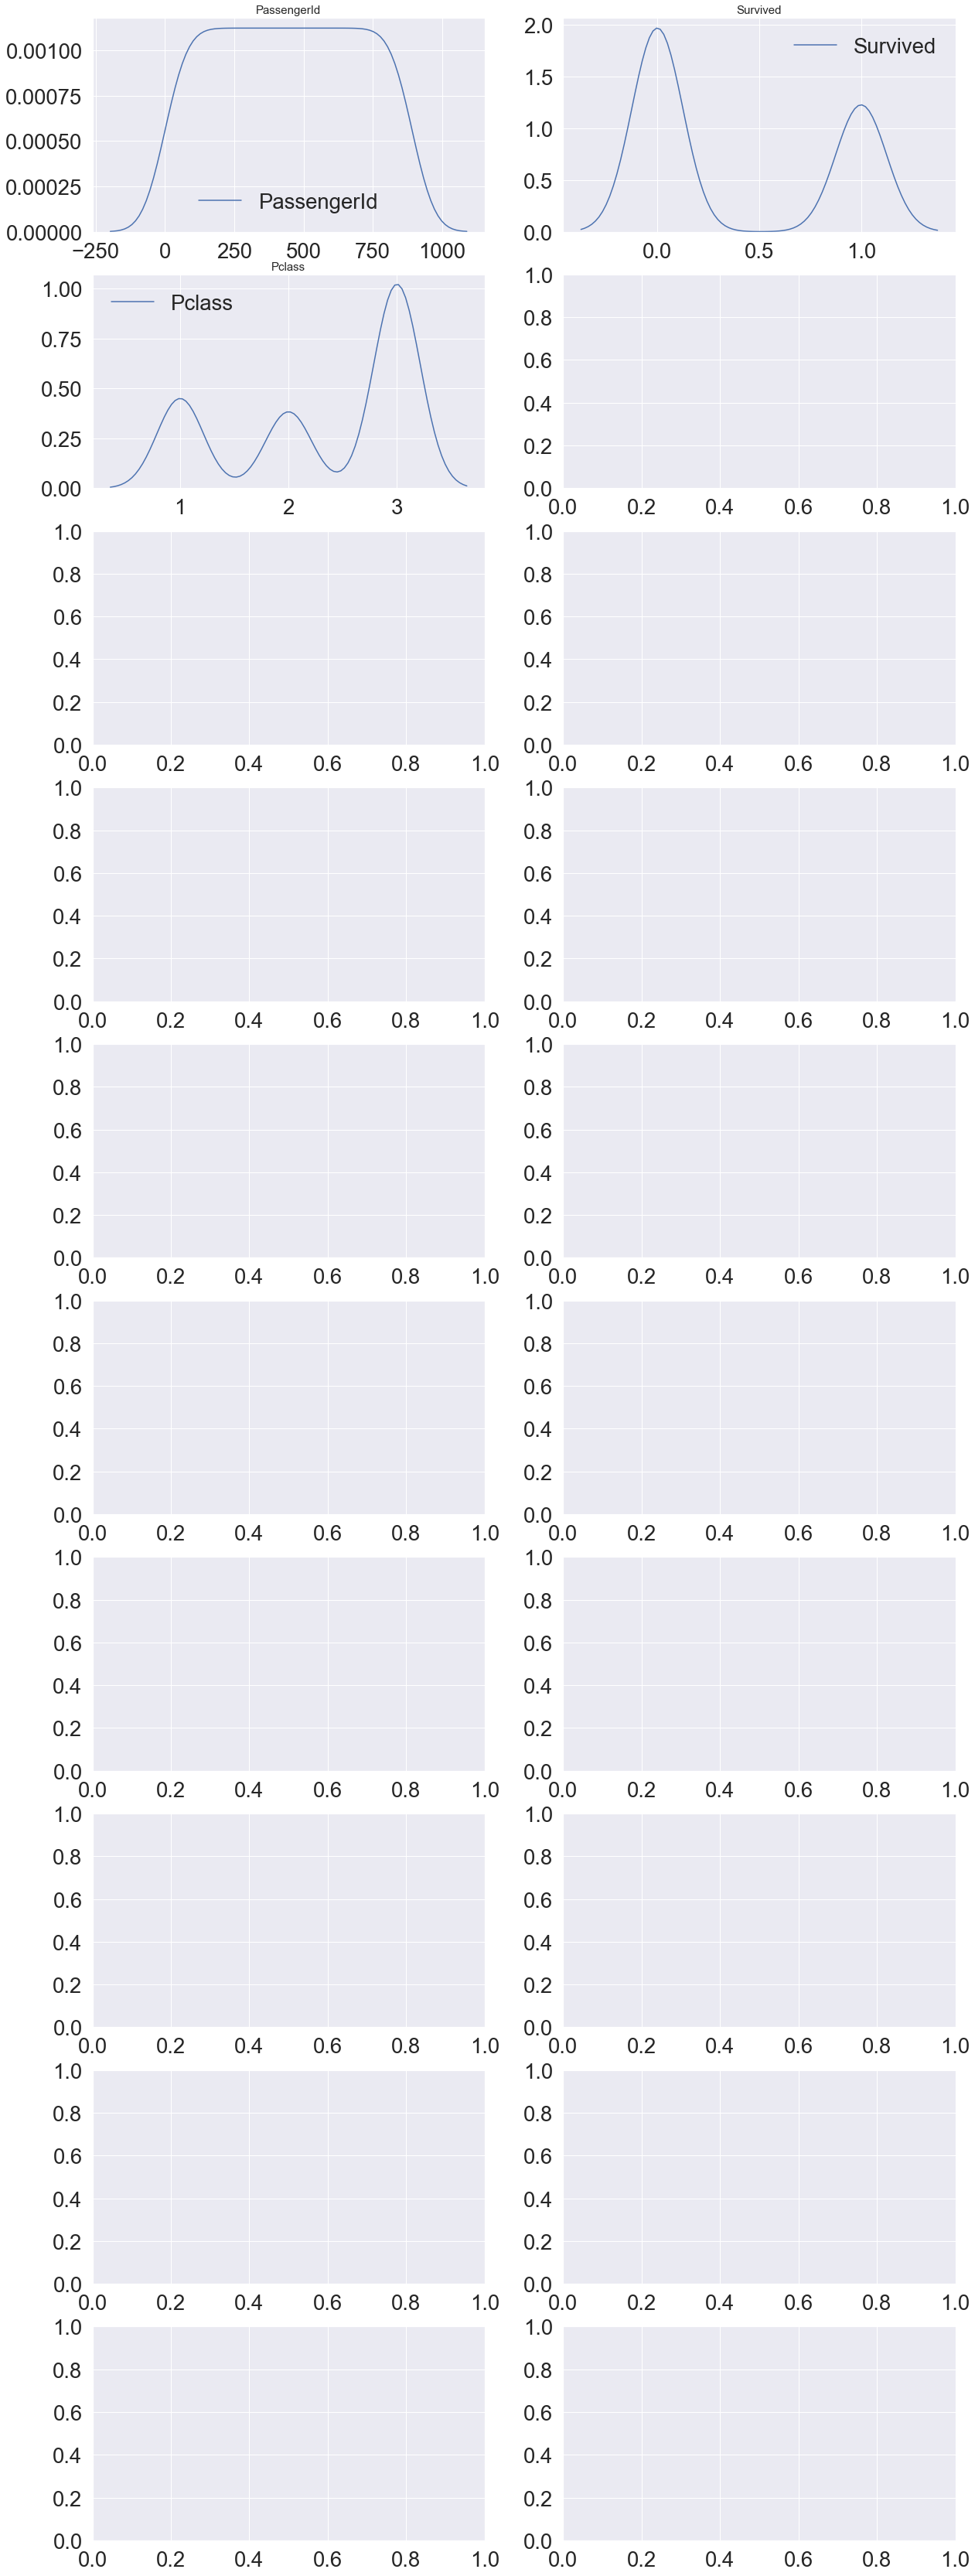

In [20]:
fig, ax = plt.subplots(10, 2, figsize=(20, 60))

# id 변수는 제외하고 분포를 확인합니다.
count = 0
columns = df_train.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(df_train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 19 :
            break